In [4]:
# Created: 20250103

In [1]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: ml312-2024; pyv: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:27:36) [GCC 11.2.0]'

In [2]:
print(pyu.ps2("requests"))

requests==2.32.3



In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


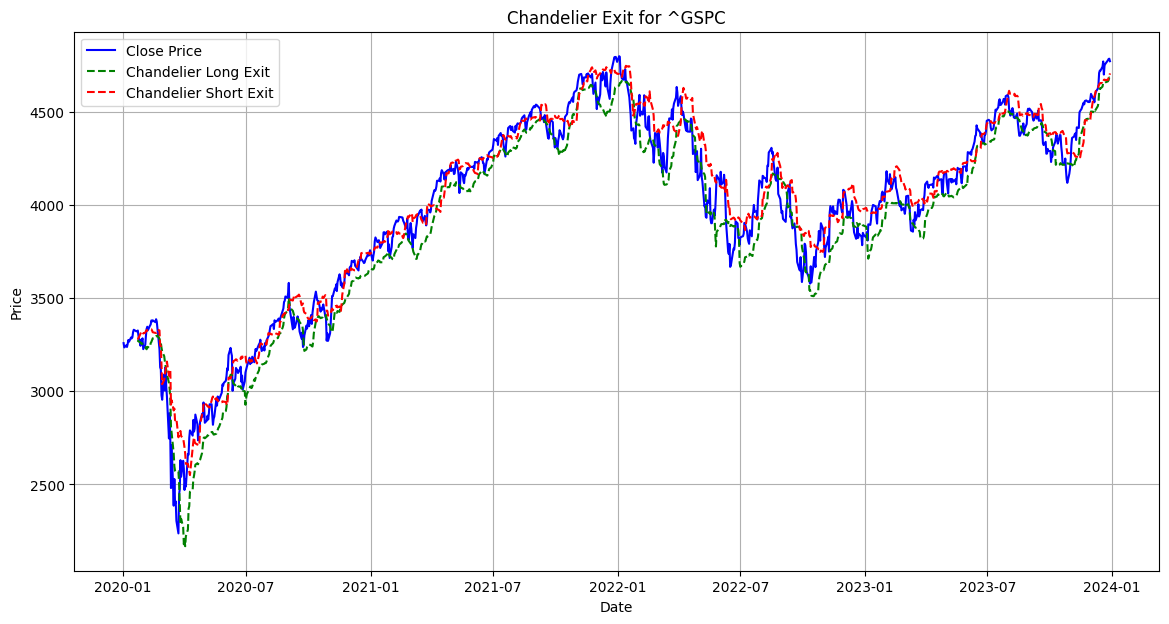

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt



# Step 2: Calculate ATR
def calculate_atr(data, atr_window=14):
    data['High-Low'] = data['High'] - data['Low']
    data['High-Close'] = abs(data['High'] - data['Close'].shift(1))
    data['Low-Close'] = abs(data['Low'] - data['Close'].shift(1))
    data['True Range'] = data[['High-Low', 'High-Close', 'Low-Close']].max(axis=1)
    data['ATR'] = data['True Range'].rolling(window=atr_window).mean()
    return data

# Step 3: Calculate Chandelier Exit
def calculate_chandelier_exit(data, atr_window=14, multiplier=3):
    data = calculate_atr(data, atr_window)
    data['Highest High'] = data['High'].rolling(window=atr_window).max()
    data['Lowest Low'] = data['Low'].rolling(window=atr_window).min()
    data['Chandelier Long Exit'] = data['Highest High'] - (multiplier * data['ATR'])
    data['Chandelier Short Exit'] = data['Lowest Low'] + (multiplier * data['ATR'])
    return data




In [7]:
def show_graph(symbol):

    # Step 1: Download historical data
    start = "2020-01-01"
    end = "2024-12-31"
    data = yf.download(symbol, start=start, end=end)
    
    # Apply Chandelier Exit calculation
    data = calculate_chandelier_exit(data)
    
    # Step 4: Plot Chandelier Exit
    plt.figure(figsize=(14, 7))
    
    # Plot Close Price
    plt.plot(data['Close'], label='Close Price', color='blue')
    
    # Plot Chandelier Exit for Long and Short positions
    plt.plot(data['Chandelier Long Exit'], label='Chandelier Long Exit', color='green', linestyle='--')
    plt.plot(data['Chandelier Short Exit'], label='Chandelier Short Exit', color='red', linestyle='--')
    
    plt.title(f'Chandelier Exit for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

[*********************100%***********************]  1 of 1 completed


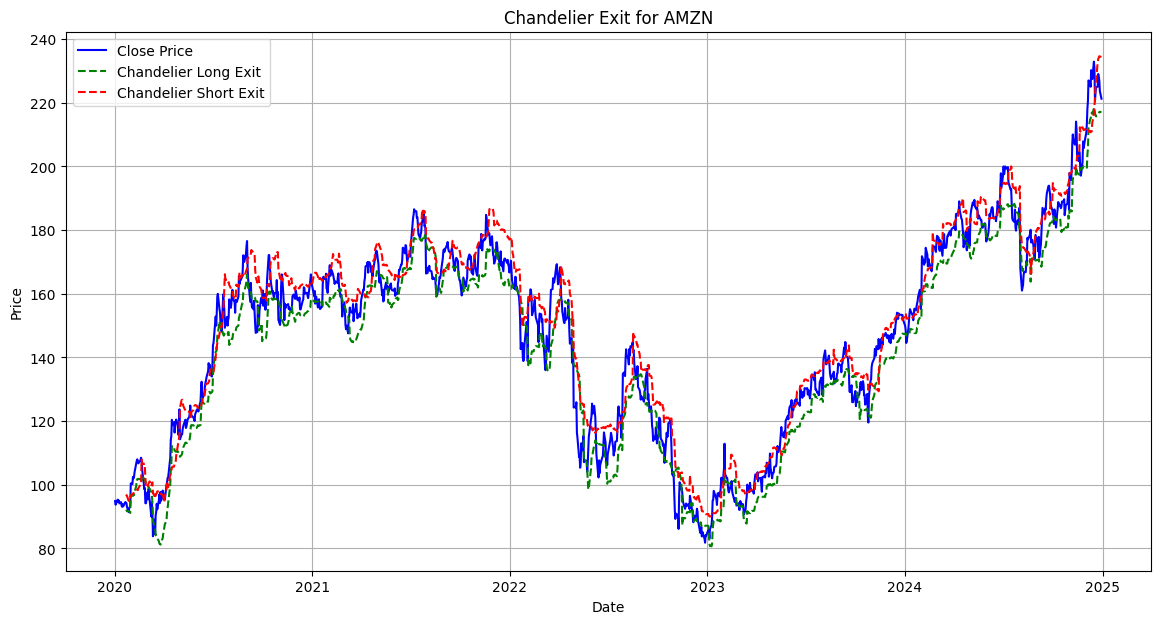

In [8]:
show_graph("AMZN")